# TensorFlow CNN Handle

# Preprocess

In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


/home/chrislu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
#y_labels = mnist.train.labels
#x_trains = mnist.train.images

In [3]:
def weight(shape):
    # stddev : 常態分佈標準差
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name="W")

def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name="b")

def conv2d(x , W):
    # strides [1, stride, stride, 1]
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2 ,1], strides=[1, 2, 2 ,1], padding='SAME')

## Create Model

In [4]:
# input layer
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float", shape=[None, 784], name="x")
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    # -1 : don't know the input number
    # 1  : gray

# Conv1
with tf.name_scope('C1_Conv'):
    W1 = weight([5, 5, 1, 16]) # 5*5 filter size 1: number of input 16: 16 num of output
    b1 = bias([16])
    Conv1 = conv2d(x_image, W1) + b1
    C1_Conv = tf.nn.relu(Conv1)
    
# POOL 1
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)
    

# Conv2
with tf.name_scope('C2_Conv'):
    W2 = weight([5, 5, 16, 36]) # 5*5 filter size 1: gray 16: 16 num of filter
    b2 = bias([36])
    Conv2 = conv2d(C1_Pool, W2) + b2
    C2_Conv = tf.nn.relu(Conv2)
    
# POOL 2
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv)
    
# Flatten
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764]) # 36*7*7=1764
    
# Hidden Layer
with tf.name_scope("D_Hidden_layer"):
    W3 = weight([1764, 128])
    b3 = bias([128])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, W3) + b3)
    D_Hidden_Dropout = tf.nn.dropout(D_Hidden, keep_prob=0.8)
              
# Output layer
with tf.name_scope('Output_layer'):
    W4 = weight([128, 10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4) + b4)
    
# Optimizer
with tf.name_scope('optimizer'):
    y_labels = tf.placeholder("float", shape=[None, 10], name="y_label")
    
    loss_function = tf.reduce_mean(
                        tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,
                                                                labels=y_labels))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)\
                        .minimize(loss_function)
    
# Evalute
with tf.name_scope('evaluate_model'):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1), 
                                  tf.argmax(y_labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



## Training

In [5]:
trainEpochs = 30
batchSize = 100
totalBatchs = int(mnist.train.num_examples / batchSize)
epoch_list = [];
accuracy_list = [];
loss_list = [];
from time import time
startTime = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x:batch_x, y_labels:batch_y})
    
    loss, acc = sess.run([loss_function, accuracy],
                        feed_dict={x: mnist.validation.images,
                                   y_labels: mnist.validation.labels})
    
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", \
          "{:.9f}".format(loss), "Accuracy=", acc)
    
duration = time() - startTime
print("training time : ", duration)

Train Epoch: 01 Loss= 1.649843335 Accuracy= 0.8284
Train Epoch: 02 Loss= 1.614645481 Accuracy= 0.854
Train Epoch: 03 Loss= 1.534785390 Accuracy= 0.9384
Train Epoch: 04 Loss= 1.511647701 Accuracy= 0.954
Train Epoch: 05 Loss= 1.503637910 Accuracy= 0.963
Train Epoch: 06 Loss= 1.498201251 Accuracy= 0.9674
Train Epoch: 07 Loss= 1.494311333 Accuracy= 0.971
Train Epoch: 08 Loss= 1.491357088 Accuracy= 0.9744
Train Epoch: 09 Loss= 1.490388632 Accuracy= 0.9732
Train Epoch: 10 Loss= 1.487350821 Accuracy= 0.9774
Train Epoch: 11 Loss= 1.485798001 Accuracy= 0.9778
Train Epoch: 12 Loss= 1.483962178 Accuracy= 0.9794
Train Epoch: 13 Loss= 1.484058619 Accuracy= 0.9788
Train Epoch: 14 Loss= 1.481833935 Accuracy= 0.9818
Train Epoch: 15 Loss= 1.481548071 Accuracy= 0.9818
Train Epoch: 16 Loss= 1.480976582 Accuracy= 0.982
Train Epoch: 17 Loss= 1.481394529 Accuracy= 0.9806
Train Epoch: 18 Loss= 1.477777958 Accuracy= 0.9842
Train Epoch: 19 Loss= 1.477643609 Accuracy= 0.9848
Train Epoch: 20 Loss= 1.477036715 Ac

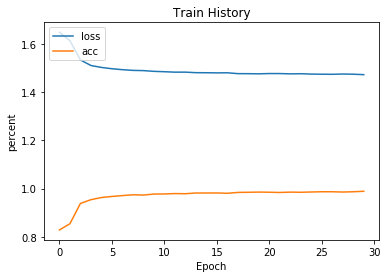

In [11]:
# draw the loss and acc pic
import matplotlib.pyplot as plt

def show_train_history(epoch_list, loss_list, acc_list):
    plt.plot(epoch_list, loss_list, label="loss")
    plt.plot(epoch_list, acc_list, label="acc")
    plt.title('Train History')
    plt.ylabel('percent')
    plt.xlabel('Epoch')
    plt.legend(['loss', 'acc'], loc='upper left')
    plt.show()

show_train_history(epoch_list, loss_list, accuracy_list)

## Evalute Model Accuracy by test

In [12]:
print("Accuracy:",\
      sess.run(accuracy, feed_dict={x:mnist.test.images,
                                    y_labels: mnist.test.labels}))

Accuracy: 0.9863


## Predict

In [15]:
prediction_result = sess.run(tf.argmax(y_predict, 1),
                             feed_dict={x: mnist.test.images,
                                        y_labels: mnist.test.labels})

In [16]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

## TensorBoard

In [17]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('CNN', sess.graph)